# Using the Accelerated Orthogonal Least-Squares algorithm for building Polynomial NARX models

Example created by Wilson Rocha Lacerda Junior

In [1]:
import pandas as pd
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
from sysidentpy.model_structure_selection import AOLS

# generating simulated data
x_train, x_test, y_train, y_test = get_siso_data(
    n=1000, colored_noise=False, sigma=0.001, train_percentage=90
)

In [2]:

basis_function = Polynomial(degree=2)
model = AOLS(
    xlag=3,
    ylag=3,
    k=5,
    L=1,
    basis_function=basis_function
)

model.fit(X=x_train, y=y_train)

In [3]:
yhat = model.predict(X=x_test, y=y_test)
rrse = root_relative_squared_error(y_test, yhat)
print(rrse)
results = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(results)

0.0017953696801823436
      Regressors  Parameters             ERR
0         y(k-1)  1.9992E-01  0.00000000E+00
1         y(k-2)  1.1675E-04  0.00000000E+00
2        x1(k-2)  9.0002E-01  0.00000000E+00
3  x1(k-1)y(k-1)  1.0004E-01  0.00000000E+00
4  x1(k-3)y(k-1)  1.8530E-04  0.00000000E+00


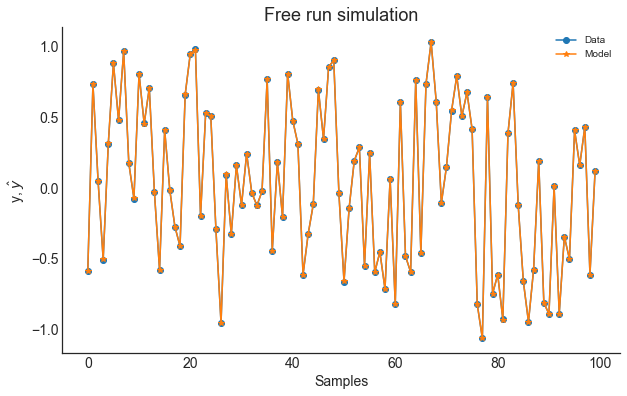

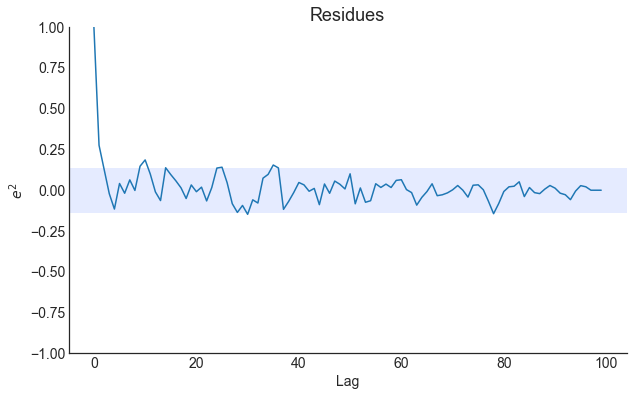

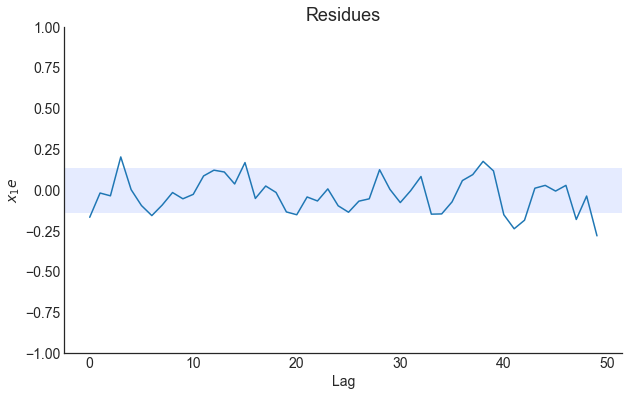

In [4]:
plot_results(y=y_test, yhat = yhat, n=1000)
ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_test, yhat, x_test)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")